In [20]:
import os, sys
sys.path.append('./../')

from calibrate_mod import calibrate
from imaging_mod import camera, img_system


import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
from skimage import io

# mark calibration points:

##### data from the calibration images extracted manually:

In [88]:
calPoints_1 = {1: [(0. , 0., 0.), (562, 1024)],
               2: [(30., 0., 0.), (780, 981) ],
               3: [(60., 0., 0.), (986, 942) ],
               4: [(0., 40., 0.), (548, 729) ],
               5: [(30.,40., 0.), (776, 694) ],
               6: [(60.,40., 0.), (991, 662) ],
               7: [(0., 70., 0.), (536, 492) ],
               8: [(30.,70., 0.), (773, 464) ],
               9: [(60.,70., 0.), (996, 438) ]}


calPoints_2 = {1: [(0. , 0., 0.), (799, 932)  ],
               2: [(30., 0., 0.), (993, 991)  ],
               3: [(60., 0., 0.), (1201,1056) ],
               4: [(0., 40., 0.), (796, 664)  ],
               5: [(30.,40., 0.), (1000, 716) ],
               6: [(60.,40., 0.), (1219, 773) ],
               7: [(0., 70., 0.), (795, 449)  ],
               8: [(30.,70., 0.), (1007, 494) ],
               9: [(60.,70., 0.), (1236, 544) ]}

#### Show the images and mark the given coordinates:

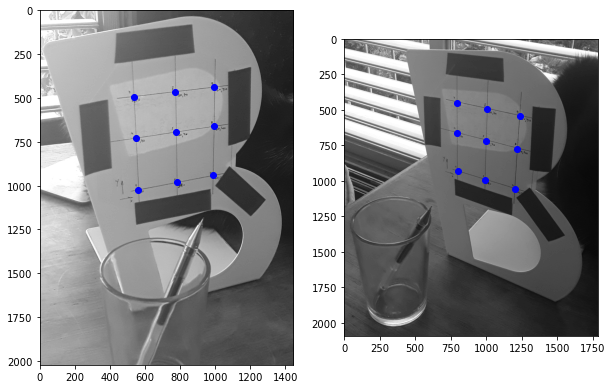

In [89]:
img1 = color.rgb2gray(io.imread('img1.jpg'))
img2 = color.rgb2gray(io.imread('img2.jpg'))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10,8)

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')


for k in calPoints_1:
    ax[0].plot(calPoints_1[k][1][0], calPoints_1[k][1][1], 'bo')
    
    
for k in calPoints_2:
    ax[1].plot(calPoints_2[k][1][0], calPoints_2[k][1][1], 'bo')

# Calibrate cameras:

### camera 1:

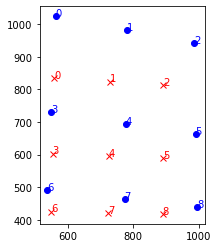

In [85]:
imgCoords_1 = [np.array(calPoints_1[k][1]) for k in sorted(calPoints_1)]
labCoords1 = [np.array(calPoints_1[k][0]) for k in sorted(calPoints_1)]

cam1 = camera('cam1', img1.shape)


# give initial guess for camera parameters:
cam1.O = np.array([-100.0, 100.0, 500.0])
cam1.theta = np.array([3.3, 0.35, 0.0])
cam1.f=3000
cam1.calc_R()

cal1 = calibrate(cam1,labCoords1, imgCoords_1)

# plot initial guess
cal1.plot_proj()

Optimization terminated successfully.
         Current function value: 12.452957
         Iterations: 983
         Function evaluations: 1553
Optimization terminated successfully.
         Current function value: 3.434262
         Iterations: 1070
         Function evaluations: 1656
Optimization terminated successfully.
         Current function value: 2.969227
         Iterations: 1589
         Function evaluations: 2457


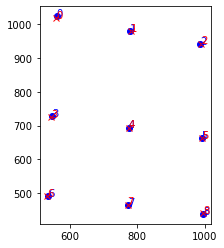

In [86]:
# optimize camera parameters three times and plot:
for i in range(2):
    cal1.searchCalibration()
    
cal1.searchCalibration(fix_f=False)

cal1.plot_proj()

In [87]:
print('O: ', cam1.O)
print('theta: ', cam1.theta)
print('f: ', cam1.f)

O:  [-89.81946893 173.66311981 342.9216929 ]
theta:  [ 3.50839933  0.4144736  -0.01095775]
f:  3046.1905919216515


### camera 2:

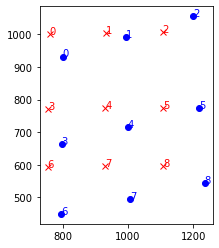

In [82]:
imgCoords_2 = [np.array(calPoints_2[k][1]) for k in sorted(calPoints_2)]
labCoords2 = [np.array(calPoints_2[k][0]) for k in sorted(calPoints_2)]

cam2 = camera('cam2', img2.shape)


# give initial guess for camera parameters:
cam2.O = np.array([100.0, 100.0, 500.0])
cam2.theta = np.array([3.3, -0.1, 0.0])
cam2.f=3000
cam2.calc_R()

cal2 = calibrate(cam2,labCoords2, imgCoords_2)

# plot initial guess
cal2.plot_proj()

Optimization terminated successfully.
         Current function value: 4.557054
         Iterations: 1087
         Function evaluations: 1696
Optimization terminated successfully.
         Current function value: 1.579581
         Iterations: 929
         Function evaluations: 1460
Optimization terminated successfully.
         Current function value: 1.579568
         Iterations: 1041
         Function evaluations: 1655


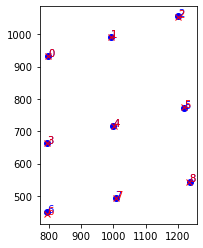

In [83]:
# optimize camera parameters three times and plot:
for i in range(2):
    cal2.searchCalibration()
    
cal2.searchCalibration(fix_f=False)
    
# plot initial guess
cal2.plot_proj()

In [84]:
print('O: ', cam2.O)
print('theta: ', cam2.theta)
print('f: ', cam2.f)

O:  [185.72714746 204.49038982 299.85320973]
theta:  [ 3.63525752 -0.47827456 -0.03834723]
f:  2999.7524891520534
